<a href="https://colab.research.google.com/github/veranika-izrailyan/Machine_Learning/blob/main/Shrinkage_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('boston.csv')

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import Ridge

In [8]:
ridge = Ridge(normalize=True)


In [10]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2_train = ridge.score(X_train, y_train)
print(f'Training performance: {r2_train}')

Training performance: 0.6455308110733852


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [11]:
r2_test = ridge.score(X_test, y_test)
print(f'Test performance: {r2_test}')

Test performance: 0.6131761189153752


In [13]:
import numpy as np
ridge = Ridge(normalize=True)
alphas = np.logspace(-3,3,10)
coef = []
for a in alphas:
  ridge.set_params(alpha = a)
  ridge.fit(X_train, y_train)
  coef.append(ridge.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

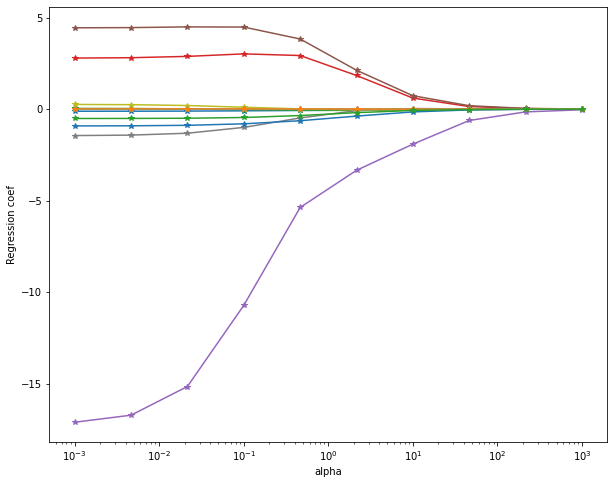

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(alphas, coef, marker='*')
ax.set_xlabel('alpha')
ax.set_ylabel('Regression coef')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3,3,10)}
grid = GridSearchCV(ridge, param_grid, cv = 10, return_train_score=True)
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

GridSearchCV(cv=10, estimator=Ridge(alpha=1000.0, normalize=True),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             return_train_score=True)

In [16]:
grid.best_score_

0.6995263634539468

In [17]:
grid.best_params_

{'alpha': 0.021544346900318832}